<a href="https://colab.research.google.com/github/dcolinmorgan/LTCOPDsex/blob/master/gpuMilipeed_%26_ltcopd_sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os,gc
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from psutil import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install cupy-cuda101==7.4.0
import cupy as cp
# print(cp.__version__)
!pip freeze | grep cupy

In [3]:
# !rm -rf netZooPy

In [ ]:
# !git clone https://github.com/netZoo/netZooPy.git
!git clone --single-branch --branch milipeed https://github.com/dcolinmorgan/netZooPy.git
os.chdir('netZooPy')
!pip install -e ./

In [5]:
# from importlib import reload  
# reload(netZooPy)

In [6]:
import netZooPy
from netZooPy.panda import Panda
# from netZooPy.lioness import Lioness
from netZooPy.milipeed import Milipeed
os.chdir('..')

In [7]:
# !pip install GEOparse

In [8]:
# https://geoparse.readthedocs.io/en/latest/Analyse_hsa-miR-124a-3p_transfection_time-course.html#
# import GEOparse
# gsem = GEOparse.get_GEO(geo="GSE92511", destdir="./")
# gsem = GEOparse.get_GEO(filepath="GSE92511_family.soft.gz")

##expression
# gsee = GEOparse.get_GEO(geo="GSE76925", destdir="./")
# gsee = GEOparse.get_GEO(filepath="GSE76925_family.soft.gz")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
# illumina_labels=pd.read_csv('drive/My Drive/Colab Notebooks/illumina_labels.txt',sep=';',header=0)
labels=pd.read_csv('drive/My Drive/Colab Notebooks dcm/v14bexp.txt',sep='\t',header=0)

In [ ]:
# expression = gsee.pivot_samples('VALUE')
# expression.index=illumina_labels['Gene']
# expression=expression[expression.index.notnull()]
# expression.columns=labels.columns[1:]

In [ ]:
LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/ppi2015_freezeCellLine.txt',sep='\t',header=None)
LCL_ppi.to_csv('ppi_complete.txt',sep='\t',index=False)
# expression.to_csv('GPL10558.txt',sep='\t',index=True,header=True)
# methylation.to_csv('GSE76925.txt',sep='\t',index=True,header=True)
# # LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/gpuPANDA/Hugo_motifCellLine_reduced.txt',sep='\t',header=None)
# # LCL_motif.to_csv('Hugo_motifCellLine_reduced.txt',sep='\t',index=False)
# coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
# coding_LCL_motif[coding_LCL_motif[2]!=0].to_csv('one_coding_LCL_motif.txt',sep='\t',index=False,header=False)
milipeed_test_motif=pd.read_csv('drive/My Drive/Colab Notebooks dcm/milipeed_test_tr.txt',sep='\t',header=0,index_col=0)
milipeed_test_motif.columns = milipeed_test_motif.columns.str.replace("-", ".")
milipeed_test_motif.to_csv('milipeed_test_motif.txt',sep='\t',index=True,header=True)


In [ ]:
# tmp_expdata = expression#pd.read_csv(expression_file,sep='\t',header=0,nrows=0)
# tmp_betadata = milipeed_test_motif#pd.read_csv(methylation_file,sep='\t',header=0,nrows=0)
# b_subj=tmp_betadata.columns[(tmp_betadata.columns).isin(tmp_expdata)].dropna().tolist()
# e_subj=tmp_expdata.columns[(tmp_expdata.columns).isin(tmp_betadata)].dropna().tolist()
# # tmp_betadata2[pd.DataFrame(tmp_betadata2).isin(tmp_expdata2),]
# print('Number of subjects:', len(b_subj))



In [ ]:
# milipeed_obj2=Milipeed('GPL10558.txt','milipeed_test_motif.txt','ppi_complete.txt',

milipeed_obj=Milipeed('drive/My Drive/Colab Notebooks dcm/gene_exp_v14b.txt','milipeed_test_motif.txt','ppi_complete.txt',
    computing='gpu',save_dir='milipeed_output/',
    save_fmt='npy',map_file='netZooPy/tests/milipeed/MotifPrior_CGmap.txt')
# milipeed_obj.save_milipeed_results(file='LTCOPDmilipeed_02232020.txt')



In [ ]:
!zip -r milipeed_output.zip milipeed_output

In [ ]:
!cp -R milipeed_output.zip "/content/drive/My Drive/"

cp: error writing '/content/drive/My Drive/milipeed_output.zip': No space left on device


In [ ]:
from google.colab import files
files.download('milipeed_output.zip')

In [ ]:
!pip install GEOparse

In [ ]:
import GEOparse
gse = GEOparse.get_GEO(geo="GSE76925", destdir="./")

In [14]:
# illumina_labels=pd.read_csv('drive/My Drive/Colab Notebooks/illumina_labels.txt',sep=';',header=0)
illumina_labels=pd.read_csv('drive/My Drive/Colab Notebooks dcm/GPL10558_illumina_prb_loc.txt',sep='\t',index_col=0,header=None,names=['loc','symbol'])

In [ ]:
gpl = gse.gpls[next(iter(gse.gpls))]
data = gse.pivot_samples(values="VALUE")#, gpl=gpl, annotation_column="Symbol")
data.sort_index

In [17]:
pheno=gse.phenotype_data.rename(columns={'characteristics_ch1.0.age': 'age',"characteristics_ch1.1.Sex":"sex","characteristics_ch1.3.bmi":"bmi","characteristics_ch1.6.fev1.pp":"fev1","characteristics_ch1.4.packyears":"PY"})
pheno[['age',"sex","bmi","fev1","PY"]].to_csv('pheno_data.txt',sep='\t',index=True,header=True)

In [18]:
# data2=data.merge(illumina_labels['symbol'],left_index=True,right_index=True)
# data2.index=data2['symbol']
# del data2['symbol']
# data2.columns=[gse.phenotype_data['characteristics_ch1.1.Sex']+gse.phenotype_data['characteristics_ch1.5.copd']]
# data2.loc[:,'Mcase'].to_csv('Mcase.txt',sep='\t',index=True,header=False)
# data2.loc[:,'Mcont'].to_csv('Mcont.txt',sep='\t',index=True,header=False)

data3=data.merge(illumina_labels,left_index=True,right_index=True)
data3.index=data3['symbol']
data3=data3[data3['loc']!='Y']
del data3['symbol'], data3['loc']
data3.columns=[gse.phenotype_data['characteristics_ch1.1.Sex']+gse.phenotype_data['characteristics_ch1.5.copd']]
data3.loc[:,'Fcase'].to_csv('Fcase.txt',sep='\t',index=True,header=False)
data3.loc[:,'Fcont'].to_csv('Fcont.txt',sep='\t',index=True,header=False)


data4=data.merge(illumina_labels,left_index=True,right_index=True)
data4.index=data4['symbol']
# data4=data4[data4['loc']!='Y']
del data4['symbol'], data4['loc']
data4.columns=[gse.phenotype_data['characteristics_ch1.1.Sex']+gse.phenotype_data['characteristics_ch1.5.copd']]
data4.loc[:,'Fcase'].to_csv('FcaseFULL.txt',sep='\t',index=True,header=False)
data4.loc[:,'Fcont'].to_csv('FcontFULL.txt',sep='\t',index=True,header=False)

In [19]:
LCL_ppi=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/ppi/ppi_complete.txt',sep='\t',header=None)
LCL_ppi.to_csv('ppi_complete.txt',sep='\t',index=False,header=False)

coding_LCL_motif=pd.read_csv('https://granddb.s3.amazonaws.com/optPANDA/motifs/Hugo_motifCellLine.txt',sep='\t',header=None)
coding_LCL_motif.to_csv('coding_LCL_motif.txt',sep='\t',index=False,header=False)

motif_data='coding_LCL_motif.txt'
ppi_data='ppi_complete.txt'

In [21]:
del panda_obj1

In [ ]:
panda_obj1 = Panda('Fcase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_Fcase.npy',panda_obj1.export_panda_results)
del panda_obj1
# panda_obj2 = Panda('Mcase.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = True, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_Mcase.npy',panda_obj2.export_panda_results)
# del panda_obj2
panda_obj3 = Panda('Fcont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_Fcont.npy',panda_obj3.export_panda_results)
del panda_obj3
# panda_obj4 = Panda('Mcont.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = True, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
# np.save('drive/My Drive/Panda_Mcont.npy',panda_obj4.export_panda_results)
# del panda_obj4
panda_obj5 = Panda('FcaseFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_FcaseFULL.npy',panda_obj5.export_panda_results)
del panda_obj5
panda_obj6 = Panda('FcontFULL.txt', motif_data, ppi_data,computing='gpu',precision='single',save_tmp=False,save_memory = False, remove_missing=False, keep_expression_matrix = True,modeProcess = 'intersection')
np.save('drive/My Drive/Panda_FcontFULL.npy',panda_obj6.export_panda_results)
del panda_obj6


LTCOPD sex analysis (needed more RAM) (Fcase v Fcont)

In [5]:
Panda_Fcase=np.load('drive/My Drive/Colab Notebooks dcm/Panda_Fcase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Mcase=np.load('drive/My Drive/Colab Notebooks dcm/Panda_Mcase.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Fcont=np.load('drive/My Drive/Colab Notebooks dcm/Panda_Fcont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_Mcont=np.load('drive/My Drive/Colab Notebooks dcm/Panda_Mcont.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])

Panda_FcaseFULL=np.load('drive/My Drive/Panda_FcaseFULL.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])
Panda_FcontFULL=np.load('drive/My Drive/Panda_FcontFULL.npy',allow_pickle=True)#,sep='\t',index_col=0,header=None,names=['loc','symbol'])



Panda_Fcont=pd.DataFrame(Panda_Fcont)
Panda_Fcont.columns=['tf','gene','motif','force']
Panda_Fcase=pd.DataFrame(Panda_Fcase)
Panda_Fcase.columns=['tf','gene','motif','force']

Panda_FcontFULL=pd.DataFrame(Panda_FcontFULL)
Panda_FcontFULL.columns=['tf','gene','motif','force']
Panda_FcaseFULL=pd.DataFrame(Panda_FcaseFULL)
Panda_FcaseFULL.columns=['tf','gene','motif','force']

Panda_Mcont=pd.DataFrame(Panda_Mcont)
Panda_Mcont.columns=['tf','gene','motif','force']
Panda_Mcase=pd.DataFrame(Panda_Mcase)
Panda_Mcase.columns=['tf','gene','motif','force']

In [6]:
# Panda_Fcont.panda_results = pd.DataFrame(Panda_Fcont.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results3 = Panda_Fcont.sort_values(by=['force'], ascending=False)
subset_panda_results3['merge']=subset_panda_results3.tf+'-'+subset_panda_results3.gene

# Panda_Fcase.panda_results = pd.DataFrame(Panda_Fcase.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results1 = Panda_Fcase.sort_values(by=['force'], ascending=False)
subset_panda_results1['merge']=subset_panda_results1.tf+'-'+subset_panda_results1.gene

www=subset_panda_results3.merge(subset_panda_results1, left_on='merge', right_on='merge')

del [[subset_panda_results3, subset_panda_results1]]
gc.collect()
subset_panda_results3=pd.DataFrame()
subset_panda_results1=pd.DataFrame()

www['diff']=www.force_x-www.force_y
www = www.sort_values(by ='diff' )

wwww=www[np.abs(www['diff'])>2]
del [[www]]
gc.collect()
www=pd.DataFrame()


# len(pd.unique(wwww['tf_x']))
# import seaborn as sns
# plt.figure(figsize=(12, 30))

# g=sns.barplot(x="diff", y="merge", data=wwww)
# g.set(xlim=(-4.5, 4.5))
# wwww.to_csv('female_caVco.txt')
pd.DataFrame([pd.unique(wwww['tf_x']),pd.unique(wwww['gene_x'])]).to_csv('drive/My Drive/unqiue_female_caVco.txt',sep='\t',header=None,index=None)

In [7]:
del [[Panda_Fcont,Panda_Fcase]]
gc.collect()
Panda_Fcont=pd.DataFrame()
Panda_Fcase=pd.DataFrame()

LTCOPD sex analysis (needed more RAM) (FcaseFULL v FcontFULL)

In [8]:
# Panda_Fcont.panda_results = pd.DataFrame(Panda_Fcont.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results5 = Panda_FcontFULL.sort_values(by=['force'], ascending=False)
subset_panda_results5['merge']=subset_panda_results5.tf+'-'+subset_panda_results5.gene

# Panda_Fcase.panda_results = pd.DataFrame(Panda_Fcase.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results6 = Panda_FcaseFULL.sort_values(by=['force'], ascending=False)
subset_panda_results6['merge']=subset_panda_results6.tf+'-'+subset_panda_results6.gene

zzz=subset_panda_results5.merge(subset_panda_results6, left_on='merge', right_on='merge')

del [[subset_panda_results5, subset_panda_results6]]
gc.collect()
subset_panda_results5=pd.DataFrame()
subset_panda_results6=pd.DataFrame()

zzz['diff']=zzz.force_x-zzz.force_y
zzz = zzz.sort_values(by ='diff' )

zzzz=zzz[np.abs(zzz['diff'])>2]
del [[zzz]]
gc.collect()
zzz=pd.DataFrame()


# len(pd.unique(zzzz['tf_x']))
# import seaborn as sns
# plt.figure(figsize=(62, 50))

# g=sns.barplot(x="diff", y="merge", data=zzzz)
# g.set(xlim=(-6.5, 6.5))
# zzzz.to_csv('female_caVco.txt')
# pd.DataFrame([pd.unique(zzzz['tf_x']),pd.unique(zzzz['gene_x'])]).to_csv('drive/My Drive/unqiue_femaleFULL_caVco.txt',sep='\t',header=None,index=None)

In [9]:
del [[Panda_FcontFULL,Panda_FcaseFULL]]
gc.collect()
Panda_FcontFULL=pd.DataFrame()
Panda_FcaseFULL=pd.DataFrame()

In [10]:
# panda_obj4.panda_results = pd.DataFrame(panda_obj4.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results4 = Panda_Mcase.sort_values(by=['force'], ascending=False)
subset_panda_results4['merge']=subset_panda_results4.tf+'-'+subset_panda_results4.gene

# panda_obj2.panda_results = pd.DataFrame(Panda_Mcont.export_panda_results, columns=['tf','gene','motif','force'])
subset_panda_results2 = Panda_Mcont.sort_values(by=['force'], ascending=False)
subset_panda_results2['merge']=subset_panda_results2.tf+'-'+subset_panda_results2.gene

ww=subset_panda_results4.merge(subset_panda_results2, left_on='merge', right_on='merge')

del [[subset_panda_results4, subset_panda_results2]]
gc.collect()
subset_panda_results4=pd.DataFrame()
subset_panda_results2=pd.DataFrame()

ww['diff']=ww.force_x-ww.force_y
ww = ww.sort_values(by ='diff' )
pppp=ww[np.abs(ww['diff'])>2]

del [[ww]]
gc.collect()
ww=pd.DataFrame()

# zzzz
# len(pd.unique(zzzz['gene_x']))
# import seaborn as sns
# plt.figure(figsize=(12, 30))

# g=sns.barplot(x="diff", y="merge", data=zzzz)
# g.set(xlim=(-4.5, 4.5))
# zzzz.to_csv('male_caVco.txt')
# [pd.unique(zzzz['tf_x']),pd.unique(zzzz['gene_x'])]
# pd.DataFrame([pd.unique(zzzz['tf_x']),pd.unique(zzzz['gene_x'])]).to_csv('drive/My Drive/unqiue_male_caVco.txt',sep='\t',header=None,index=None)

In [11]:
del [[Panda_Mcont,Panda_Mcase]]
gc.collect()
Panda_Mcont=pd.DataFrame()
Panda_Mcase=pd.DataFrame()

Female V Female Full

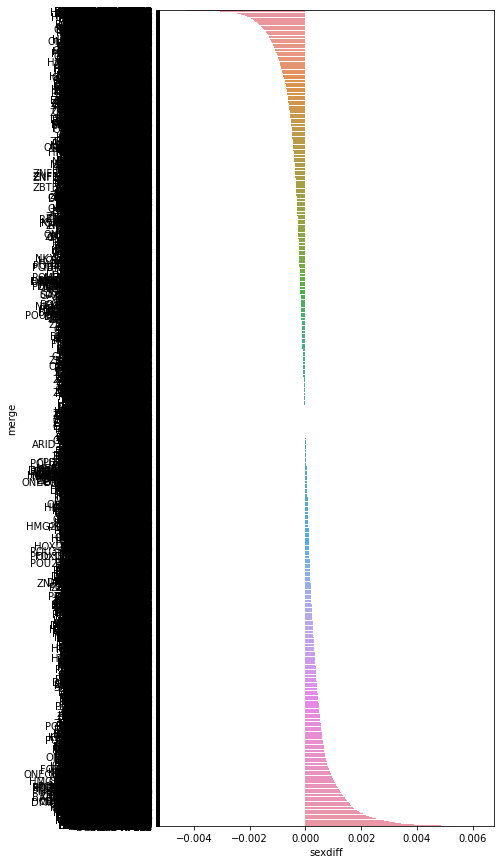

In [9]:
sexdiff=wwww.merge(zzzz,left_on='merge', right_on='merge')

plt.figure(figsize=(6, 15))
sexdiff['sexdiff']=sexdiff['diff_x']-sexdiff['diff_y']
sexdiff=sexdiff.sort_values(by=['sexdiff'])
sns.barplot(data=sexdiff,x='sexdiff',y='merge')
# g=sns.barplot(x="diff", y="merge", data=wwww)
# g.set(xlim=(-4.5, 4.5))

Female FULL V Male

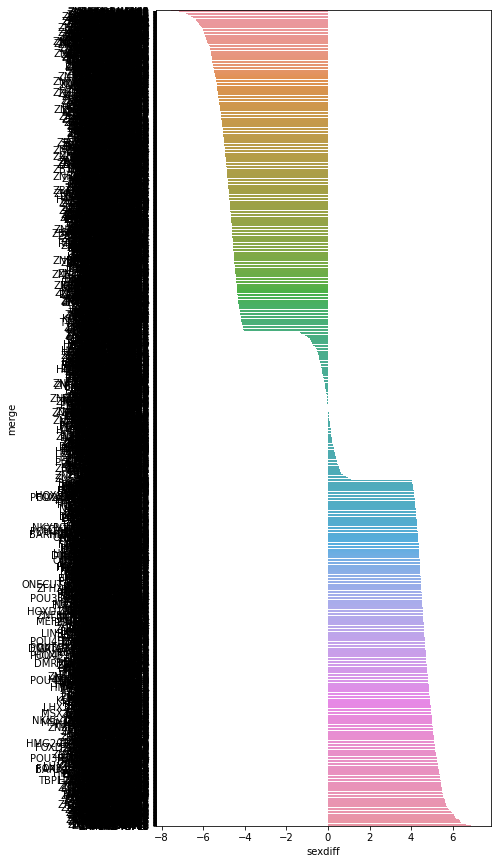

In [12]:
sexdiff=zzzz.merge(pppp,left_on='merge', right_on='merge')

plt.figure(figsize=(6, 15))
sexdiff['sexdiff']=sexdiff['diff_x']-sexdiff['diff_y']
sexdiff=sexdiff.sort_values(by=['sexdiff'])
sns.barplot(data=sexdiff,x='sexdiff',y='merge')
# g=sns.barplot(x="diff", y="merge", data=wwww)
# g.set(xlim=(-4.5, 4.5))

Female V Male

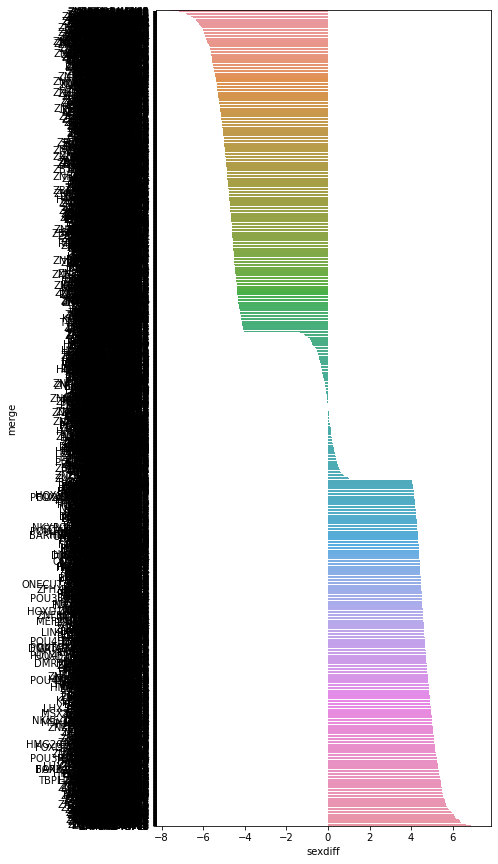

In [13]:
sexdiff=wwww.merge(pppp,left_on='merge', right_on='merge')

plt.figure(figsize=(6, 15))
sexdiff['sexdiff']=sexdiff['diff_x']-sexdiff['diff_y']
sexdiff=sexdiff.sort_values(by=['sexdiff'])
sns.barplot(data=sexdiff,x='sexdiff',y='merge')
# g=sns.barplot(x="diff", y="merge", data=wwww)
# g.set(xlim=(-4.5, 4.5))